# Churn Analysis (Data Science Project)

# 1. Import relevant libraries

In [ ]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew


# sklearn modules for data preprocessing-------------------------------------

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold




#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix



#Miscellaneous Utilitiy Libraries--------------------------------------


# 2. Set Up the current working directory & Import Dataset

In [ ]:
# Step 2: Import the dataset
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/DigitalSkola_DS51/customer churn/customer_churn_data.csv')

#Step 3: Read Dataset
dataset.head()

Mounted at /content/drive


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 4. Evaluate Data Structure

In [ ]:
# Step 4: Evaluate data structure
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Recheck Column Dataypes
col_dtypes=  (
     dataset.
     columns.
     to_series().
     groupby(dataset.dtypes).
     groups
)
type(col_dtypes)

pandas.io.formats.printing.PrettyDict

In [ ]:
for col, value in col_dtypes.items():
  print(col)
  print(value)
  print('\n')

int64
Index(['SeniorCitizen', 'tenure'], dtype='object')


float64
Index(['MonthlyCharges'], dtype='object')


object
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')




In [ ]:
#check missing value
dataset.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [ ]:
dataset.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#Unique values in each categorical variable:
print(dataset['PaymentMethod'].nunique())
dataset['PaymentMethod'].unique()

4


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
print(dataset['Contract'].nunique())
dataset['Contract'].unique()

3


array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
print(dataset['TotalCharges'].nunique())
dataset['TotalCharges'].unique()

6531


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

# 5. Check Target Variable Distribution

In [ ]:
#Step 5: Check Target Variable Distribution -----------------------------------------------
dataset["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
#Step 5: Check Target Variable Distribution -----------------------------------------------
dataset["Churn"].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


What happen here?

Answer:..........

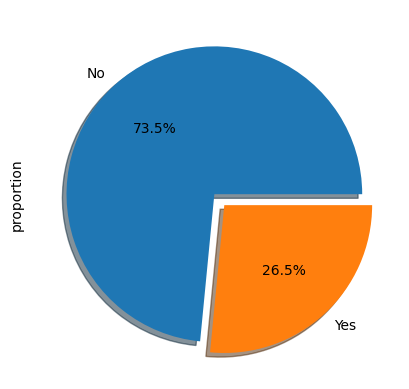

In [ ]:
explode_list= [0,0.1]

(
    dataset["Churn"].
 value_counts(normalize=True).
 plot(
     kind='pie',
      autopct='%1.1f%%',
      explode=explode_list,
      shadow=True)
 );

# 6. Clean the Dataset

In [ ]:
dataset['TotalCharges'].head()

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65


In [ ]:
#Step 6: Clean the Dataset----------------------------------------------------------------------
dataset['TotalCharges']= pd.to_numeric(dataset['TotalCharges'], errors='coerce')
dataset['TotalCharges']= dataset['TotalCharges'].astype('float')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#dataset.isna().any()
dataset.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
na_cols = dataset.isna().any()

na_cols = na_cols[na_cols == True].reset_index()
na_cols

,index,0
0,TotalCharges,True


In [ ]:
na_cols= na_cols['index'].to_list()
na_cols

['TotalCharges']

In [ ]:
#Step 7: Take care of missing data---------------------------------------------------------------
#find the average/median and fill missing valus of each columns programmitacly
na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols= na_cols['index'].to_list()

for col in dataset.columns[1:]:
  if col in na_cols:
    if dataset[col].dtypes != object:
      dataset[col] = dataset[col].fillna(dataset[col].mean()).round(0)

In [ ]:
dataset.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
dataset.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


# 8. Label Encode Binary data

In [ ]:
#Step 8: label Encode Binary data----------------------------------------------------------------

#Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns[1:]:
  if dataset[col].dtype =='object':
    if len(list(dataset[col].unique())) <= 2:
      print(col)
      le.fit(dataset[col])
      dataset[col] = le.transform(dataset[col])
      le_count += 1

print('{} columns were label binary=encode'. format(le_count))


gender
Partner
Dependents
PhoneService
PaperlessBilling
Churn
6 columns were label binary=encode


# 9. Exploratory Data Analysis

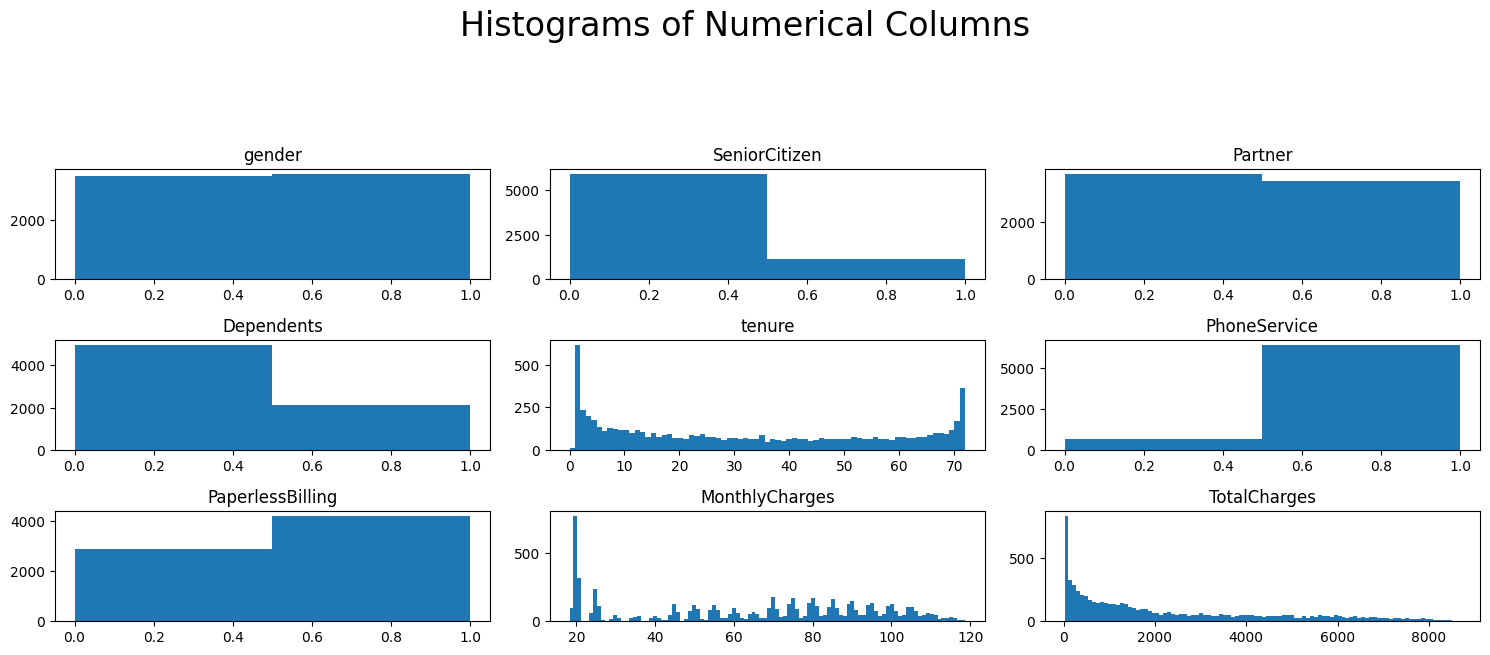

In [ ]:
#Step 9: Exploratory Data Analysis----------------------------------------------------------------------

#Step 9.1. Plot Histogram of numeric Columns--------------------------------------

dataset2 = dataset[
    [
        'gender',
        'SeniorCitizen',
        'Partner',
        'Dependents',
       'tenure',
        'PhoneService',
        'PaperlessBilling',
        'MonthlyCharges',
        'TotalCharges']]
#Histogram:

fig = plt.figure(figsize=(15, 12))
plt.suptitle(
    'Histograms of Numerical Columns\n',
    horizontalalignment="center",
    fontstyle = "normal",
    fontsize = 24,
    fontfamily = "sans-serif"
    )
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset2.iloc[:, i], bins=vals)#, color = '#ec838a')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

What are the insights from diagram above?

In [ ]:
dataset['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

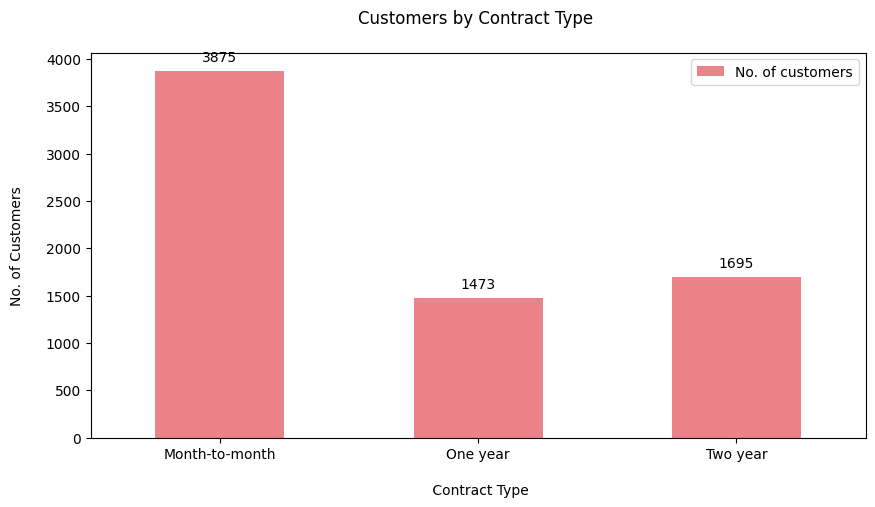

In [ ]:
#Step 9.2. x

#(1) Distribution of Contract Type----------------------------------------------------------------------------------------

contract_split = dataset[[ "customerID", "Contract"]]
sectors = contract_split .groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  (
    contract_split[["No. of customers"]]
    .plot.bar(
        title = 'Customers by Contract Type',
        legend =True,
        table = False,
        grid = False,
        subplots = False,
        figsize =(10, 5),
        color ='#ec838a',
        stacked=False)
    )

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Customers by Contract Type \n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

What can be derived from above diagram?

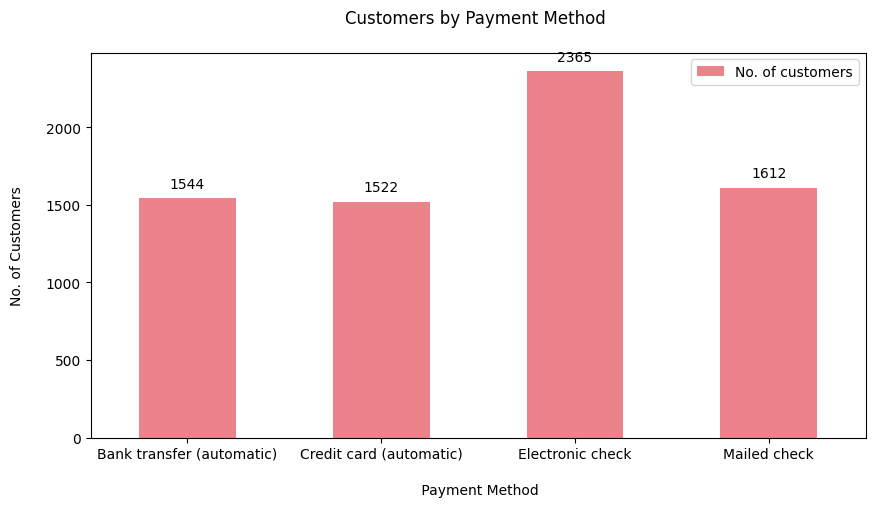

In [ ]:
#(2) Distribution of Payment Method Type---------------------------------------------------------------------------------------

payment_method_split = dataset[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split  .groupby ("PaymentMethod")
payment_method_split  = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  payment_method_split [["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False,  subplots = False,  figsize =(10, 5), color ='#ec838a', stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('\n Payment Method',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Customers by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(payment_method_split [["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

What can be derived from above diagram?

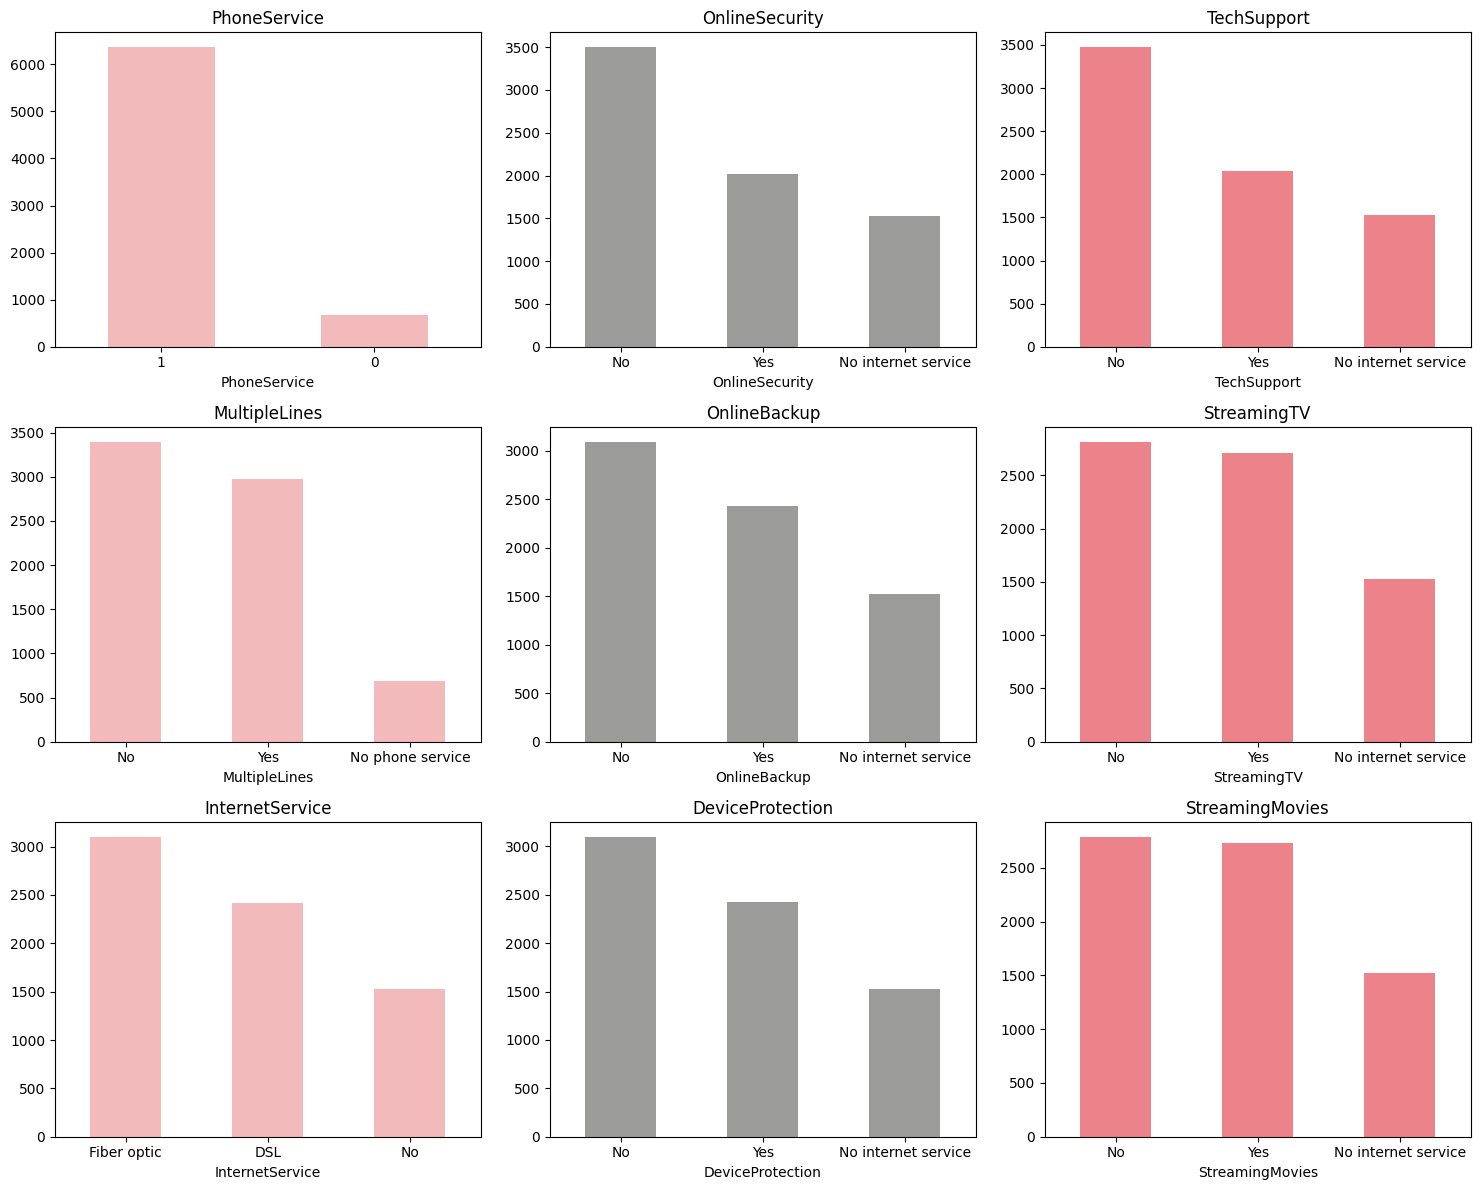

In [ ]:
#(3) Distribution of various Label Encoded Categorical Variables---------------------------------------------------------------------------------------

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )

    elif i >=3 and i < 6:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#9b9c9a')

    elif i < 9:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')
    ax.set_title(item)

plt.tight_layout()

What are the insights from above diagrams?

/tmp/ipython-input-1769341365.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate["churn_label"] = pd.Series(np.where((churn_rate["Churn"]) == 0, "No", "Yes"))


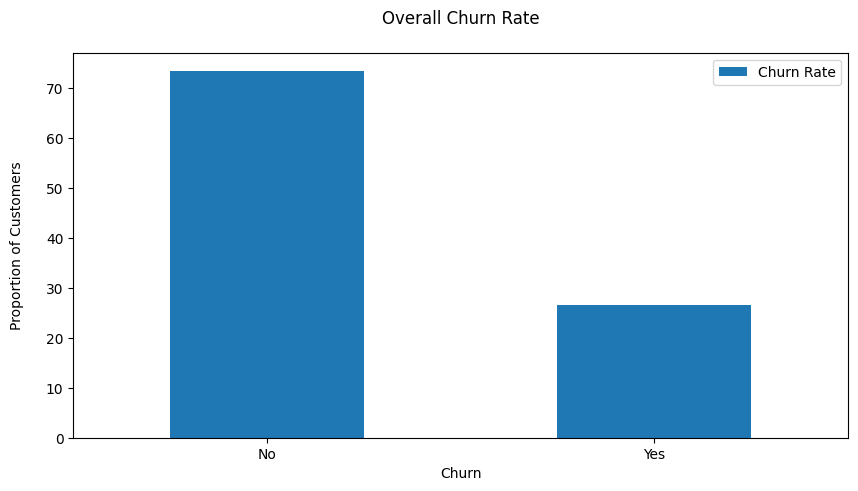

In [ ]:
#Step 9.3: Analyze Churn Rate by Categorical variables:   -------------------------------------------------------------

#(1) Overall Churn Rate------------------------------------------------------------------------------------------
import matplotlib.ticker as mtick
churn_rate = dataset[["Churn", "customerID"]]
churn_rate["churn_label"] = pd.Series(np.where((churn_rate["Churn"]) == 0, "No", "Yes"))

sectors = churn_rate.groupby("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate["Churn Rate"] = (churn_rate["customerID"] / sum(churn_rate["customerID"])) * 100

churn_rate["Churn Rate"].plot.bar(title="Overall Churn Rate", legend=True,
                                  table=False, grid=False, figsize=(10,5))

plt.ylabel("Proportion of Customers\n", horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
plt.xlabel("Churn", horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
plt.title("Overall Churn Rate\n", horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
plt.legend(loc="upper right")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(churn_rate["customerID"])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            va = 'top'
            space *= -1
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax);


In [ ]:
dataset[['Contract', 'Churn']].value_counts().plot

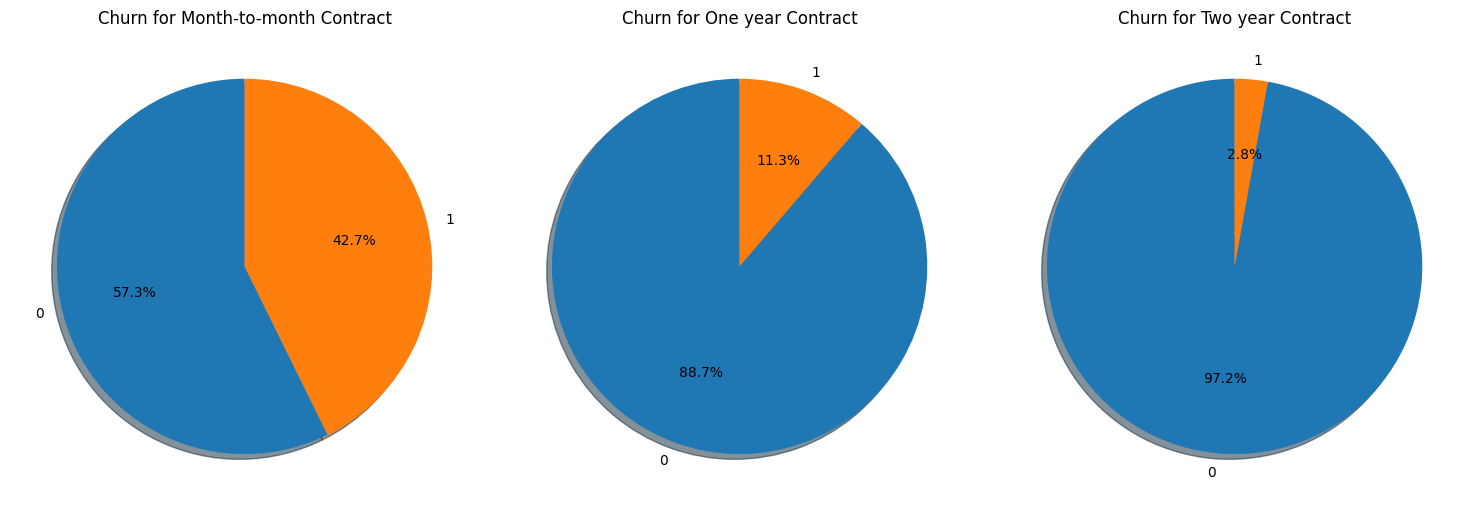

In [ ]:
contract_types = dataset['Contract'].unique()
num_subplots = len(contract_types)

# Create subplots
fig, axes = plt.subplots(1, num_subplots, figsize=(15, 5))

# Check if there's only one subplot to avoid iterating through a single axis object
if num_subplots == 1:
    axes = [axes]

# Loop through each contract type and create a pie chart
for i, contract_type in enumerate(contract_types):
    # Filter the data for the current contract type
    subset = dataset[dataset['Contract'] == contract_type]

    # Calculate value counts for 'Churn'
    churn_counts = subset['Churn'].value_counts()

    # Plot the pie chart on the corresponding subplot axis
    churn_counts.plot(
        kind='pie',
        ax=axes[i],
        autopct='%1.1f%%',
        shadow=True,
        startangle=90
    )

    # Set the title for the subplot
    axes[i].set_title(f'Churn for {contract_type} Contract')

    # Remove the default y-label
    axes[i].set_ylabel('')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.ticker as mtick



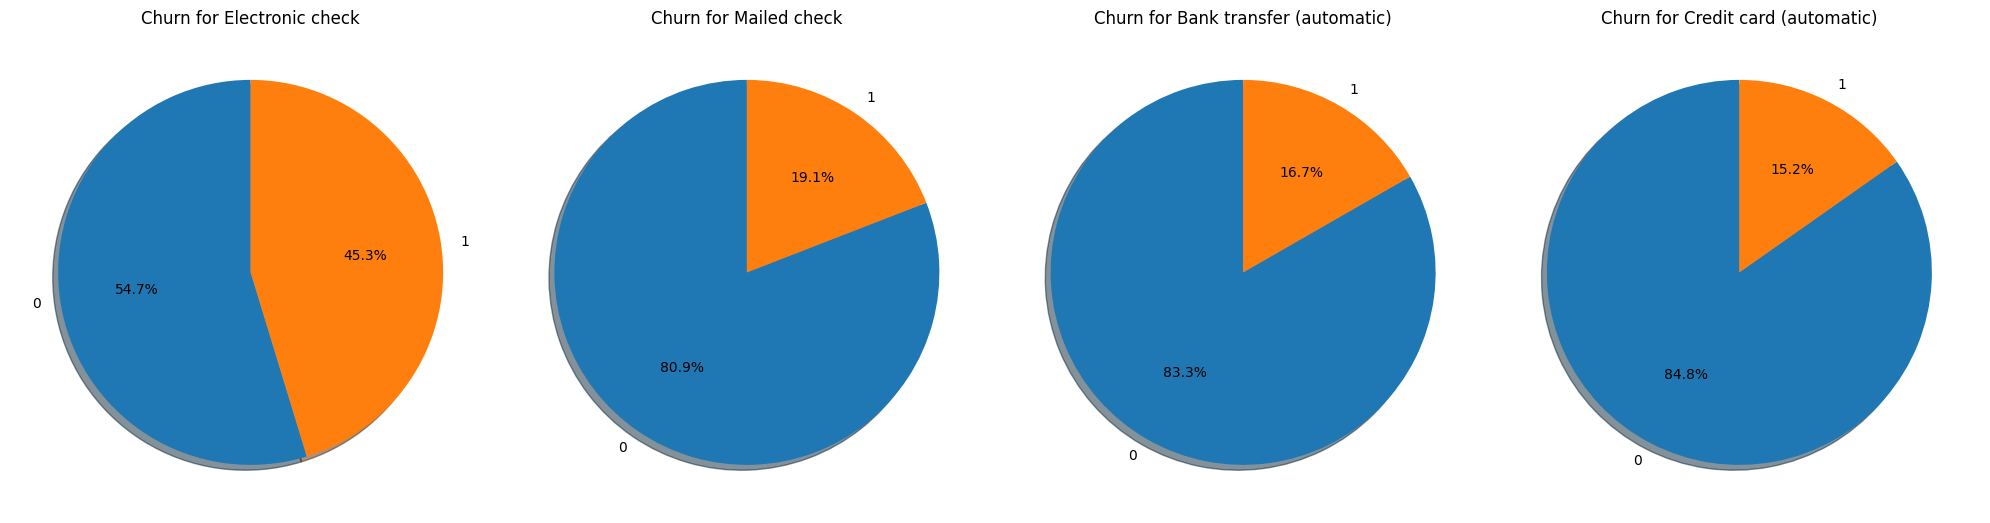

In [ ]:
payment_types = dataset['PaymentMethod'].unique()
num_subplots = len(payment_types)

# Create subplots
fig, axes = plt.subplots(1, num_subplots, figsize=(20, 6))

# Check if there's only one subplot to avoid iterating through a single axis object
if num_subplots == 1:
    axes = [axes]

# Loop through each payment method and create a pie chart
for i, payment_type in enumerate(payment_types):
    # Filter the data for the current payment method
    subset = dataset[dataset['PaymentMethod'] == payment_type]

    # Calculate value counts for 'Churn'
    churn_counts = subset['Churn'].value_counts()

    # Plot the pie chart on the corresponding subplot axis
    churn_counts.plot(
        kind='pie',
        ax=axes[i],
        autopct='%1.1f%%',
        shadow=True,
        startangle=90
    )

    # Set the title for the subplot
    axes[i].set_title(f'Churn for {payment_type}')

    # Remove the default y-label
    axes[i].set_ylabel('')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_churn_by_category(dataset, category_col, churn_col='Churn'):
    """
    Membuat pie chart distribusi churn berdasarkan kategori tertentu.

    Parameters:
    -----------
    dataset : pandas.DataFrame
        Dataset yang berisi data pelanggan.
    category_col : str
        Nama kolom kategori yang ingin dibandingkan (misalnya 'Contract', 'PaymentMethod').
    churn_col : str, default='Churn'
        Nama kolom churn (default 'Churn').
    """

    categories = dataset[category_col].unique()
    num_subplots = len(categories)

    # Buat subplot
    fig, axes = plt.subplots(1, num_subplots, figsize=(5 * num_subplots, 5))

    # Kalau hanya ada 1 kategori, jadikan list biar konsisten
    if num_subplots == 1:
        axes = [axes]

    # Loop tiap kategori
    for i, category in enumerate(categories):
        subset = dataset[dataset[category_col] == category]
        churn_counts = subset[churn_col].value_counts()

        churn_counts.plot(
            kind='pie',
            ax=axes[i],
            autopct='%1.1f%%',
            shadow=True,
            startangle=90
        )

        # Set judul
        axes[i].set_title(f'{churn_col} for {category} ({category_col})')
        axes[i].set_ylabel('')  # Hapus label default

    # Layout rapi
    plt.tight_layout()
    plt.show()


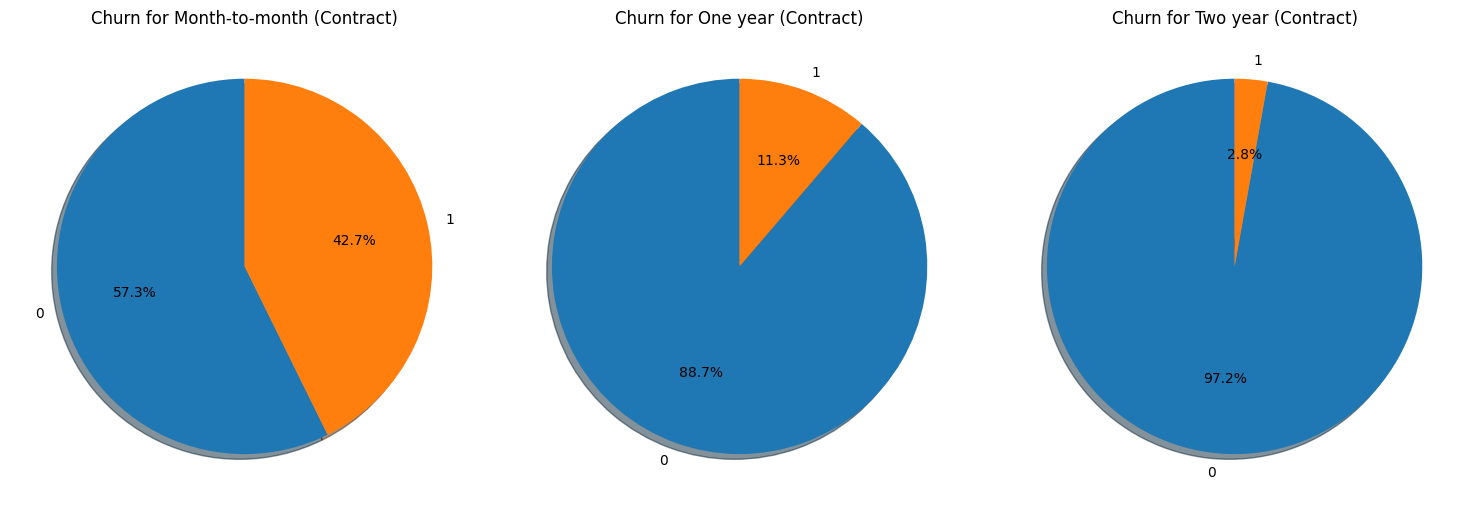

In [ ]:
plot_churn_by_category(dataset, 'Contract')

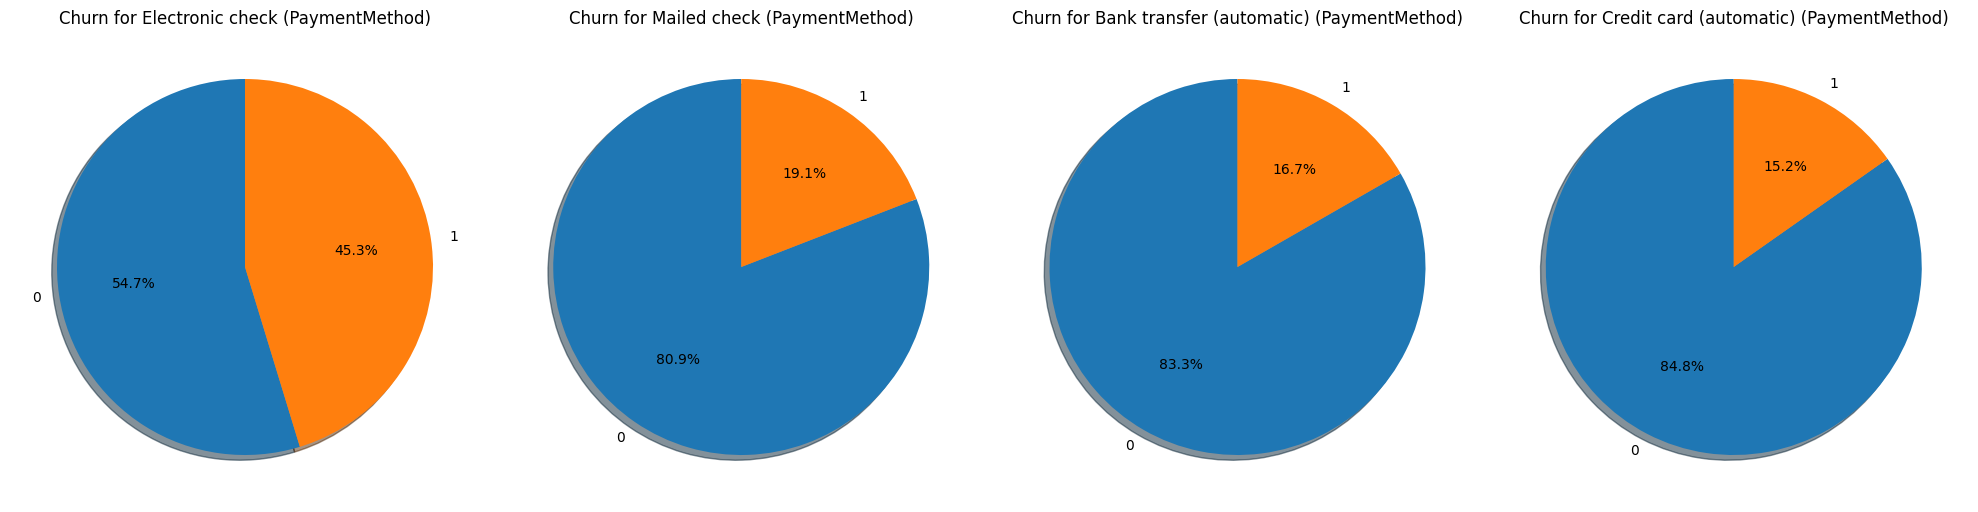

In [ ]:
plot_churn_by_category(dataset, 'PaymentMethod')

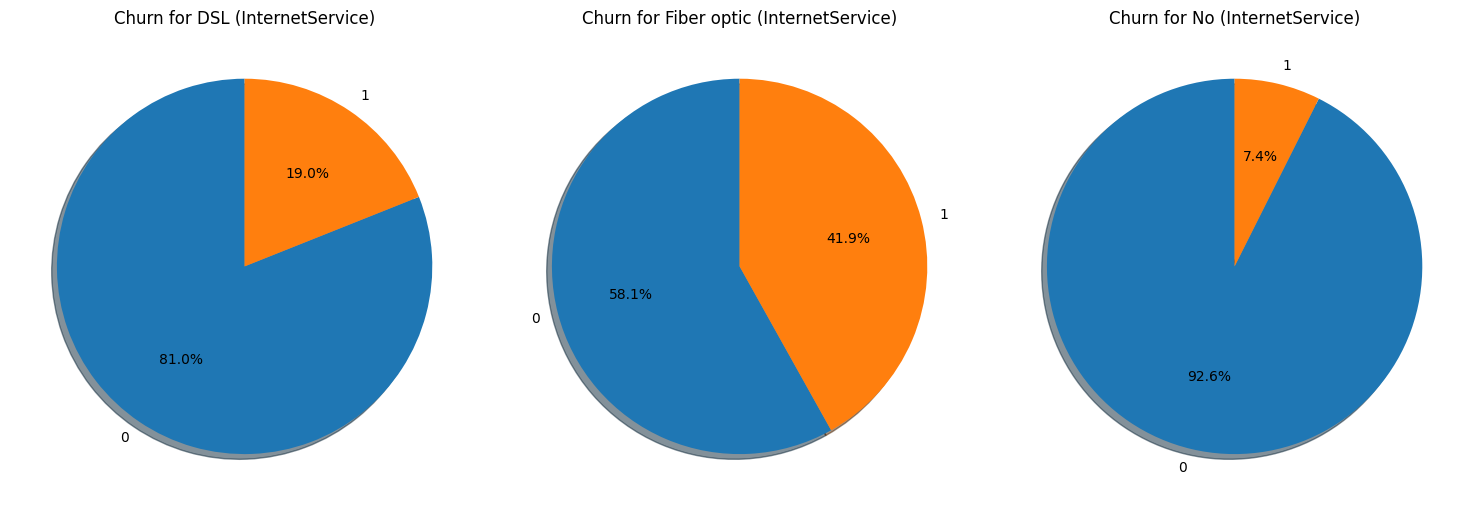

In [ ]:
plot_churn_by_category(dataset, 'InternetService')

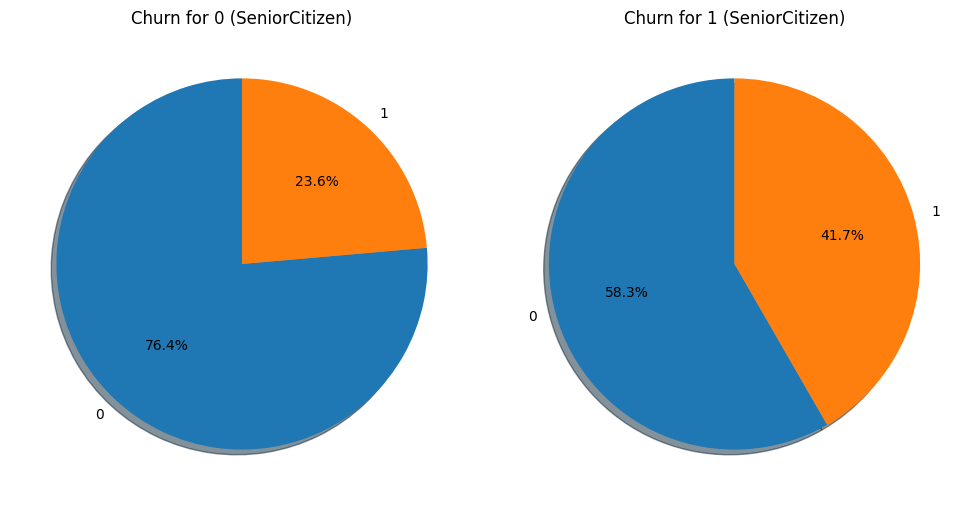

In [ ]:
plot_churn_by_category(dataset, 'SeniorCitizen')

# 10. Encode Categorical Data

In [ ]:
#Step 10: Encode Categorical data----------------------------------------------------------------

#Incase if user_id is an object:
identity = dataset["customerID"]
dataset = dataset.drop(columns="customerID")

# convert rest of categorical variable into dummy
dataset= pd.get_dummies(dataset, dtype= int)

#Rejoin userid to dataset (column concatenation)
dataset = pd.concat([dataset, identity], axis = 1)


In [ ]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID
0,0,0,1,0,1,0,1,29.85,30.0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,7590-VHVEG
1,1,0,0,0,34,1,0,56.95,1890.0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,5575-GNVDE
2,1,0,0,0,2,1,1,53.85,108.0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,3668-QPYBK
3,1,0,0,0,45,0,0,42.30,1841.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,7795-CFOCW
4,0,0,0,0,2,1,1,70.70,152.0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,9237-HQITU


# 11. Split Dataset into Dependent and Independent Variables

In [ ]:
#Step 11: Split dataset into dependent and independent variables-----------------------------------
#identify response variable:
x = dataset.drop(columns='Churn')
y = dataset['Churn']

# 12. Generate training and test datasets of dependent and independent variables


In [ ]:
#Step 12: Generate training and test datasets of dependent and independent variables-----------------
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    stratify= y,
                                                    test_size = 0.2, #use 0.1 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 41)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 41)
Number transactions y_test dataset:  (1409,)


# 13. Removing Identifiers

In [ ]:
# Step 13: Removing Identifiers-------------------------------------------------------------------
train_id = X_train['customerID']
X_train = X_train.drop(columns='customerID')

test_id = X_test['customerID']
X_test = X_test.drop(columns= 'customerID')

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,1,0,0,1,41,1,0,70.20,2895.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
5807,1,0,0,0,57,1,0,18.80,1094.0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
5118,0,0,1,0,42,1,1,85.90,3730.0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0
275,1,0,1,0,5,1,1,85.40,401.0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
1350,0,0,1,0,67,1,0,65.65,4323.0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,0,0,0,0,29,1,1,55.25,1620.0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1954,1,0,0,0,1,1,1,75.45,75.0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
525,1,0,0,0,52,1,0,91.25,4738.0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
5748,0,0,0,0,21,1,1,99.85,1993.0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0


# 14. Feature Scaling

In [ ]:
# Step 14: Feature Scaling
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2


In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,0.996103,-0.444067,-0.961343,1.545268,0.363266,0.327252,-1.203537,0.193982,0.283964,1.030277,-0.327252,-0.847780,1.367515,-0.872769,-0.529854,-0.986250,-0.529854,1.573414,-0.881957,-0.529854,1.383161,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624290,-0.818733,-0.529854,1.278739,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,-0.707107,1.825882
5807,0.996103,-0.444067,-0.961343,-0.647137,1.016103,0.327252,-1.203537,-1.515002,-0.515001,1.030277,-0.327252,-0.847780,-0.731253,-0.872769,1.887311,-0.986250,1.887311,-0.635561,-0.881957,1.887311,-0.722982,-0.888655,1.887311,-0.717014,-1.00071,1.887311,-0.624290,-0.818733,1.887311,-0.782021,-0.808189,1.887311,-0.792372,-1.116428,-0.510573,1.787480,-0.525181,1.884380,-0.707107,-0.547680
5118,-1.003913,-0.444067,1.040211,-0.647137,0.404069,0.327252,0.830884,0.715987,0.654390,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,1.133842,-0.529854,-0.722982,-0.888655,-0.529854,1.394673,-1.00071,-0.529854,1.601819,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,1.884380,-0.707107,-0.547680
275,0.996103,-0.444067,1.040211,-0.647137,-1.105616,0.327252,0.830884,0.699362,-0.822432,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,-0.881957,-0.529854,1.383161,1.125296,-0.529854,-0.717014,-1.00071,-0.529854,1.601819,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
1350,-1.003913,-0.444067,1.040211,-0.647137,1.424126,0.327252,-1.203537,0.042700,0.917459,-0.970613,-0.327252,1.179551,1.367515,-0.872769,-0.529854,-0.986250,-0.529854,1.573414,-0.881957,-0.529854,1.383161,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,-1.116428,-0.510573,1.787480,-0.525181,-0.530678,-0.707107,1.825882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,-1.003913,-0.444067,-0.961343,-0.647137,-0.126361,0.327252,0.830884,-0.303086,-0.281655,-0.970613,-0.327252,1.179551,1.367515,-0.872769,-0.529854,1.013942,-0.529854,-0.635561,-0.881957,-0.529854,1.383161,1.125296,-0.529854,-0.717014,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
1954,0.996103,-0.444067,-0.961343,-0.647137,-1.268825,0.327252,0.830884,0.368538,-0.967054,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,1.133842,-0.529854,-0.722982,1.125296,-0.529854,-0.717014,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
525,0.996103,-0.444067,-0.961343,-0.647137,0.812091,0.327252,-1.203537,0.893867,1.101562,1.030277,-0.327252,-0.847780,-0.731253,1.145778,-0.529854,-0.986250,-0.529854,1.573414,1.133842,-0.529854,-0.722982,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624

# 15. Model Selection

In [ ]:
# Step 15.1: Compare Baseline Classification Algorithms - First Iteration
# ROC AUC Mean Metrics

models = []
models.append(('Logistic Regression',
               LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')))

# Other models
models.append(('Random Forest',
               RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)))

# #tambahkan mode lain

# Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# Table to populate with performance result
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

# Evaluate model
i = 0
for name, model in models:
    kfold = KFold(n_splits=10)   # 10 Cross validation
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name, round(cv_auc_results.mean()*100,2),
                            round(cv_auc_results.std()*100,2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)]
    i += 1
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.34,1.62,74.42,1.15
1,Random Forest,82.46,2.22,79.32,1.43


In [ ]:
#Additional Steps to understand better model

# 16. Train & Evaluate Chosen Model

In [ ]:
#Step 16: Train & evaluate Chosen Model
#(Logistic Regression, beacuse it has hinger ROC/AUC scores than Random Forest)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# Fit Chosen model on the Training dataset:
chosen_model = LogisticRegression(
    solver='liblinear',
    random_state=42,
    class_weight='balanced'
)
chosen_model.fit(X_train, y_train)

# Predict the Test set results
y_pred = chosen_model.predict(X_test)
y_prob = chosen_model.predict_proba(X_test)[:, 1]

#Evaluate Model Results on Test Set:
results = {
    'Test ROC AUC': roc_auc_score(y_test, y_prob),
    'Classification Report': classification_report(y_test, y_pred),
    'Confusion Matrix': confusion_matrix(y_test, y_pred)
}
print('Test ROC AUC:', results['Test ROC AUC'])
print('\nClassification Report:\n', results['Classification Report'])
print('\nConfussion Matrix:\n', results['Confusion Matrix'])

Test ROC AUC: 0.8512361466325661

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.52      0.81      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409


Confussion Matrix:
 [[750 285]
 [ 71 303]]


#Task 1
Do the exact same modelling process, but with preprocessing : handling imbalance data !

## 12. Generate training and test datasets of dependent and independent variables


In [ ]:
#Step 12: Generate training and test datasets of dependent and independent variables-----------------
X = dataset.drop(columns='Churn', axis=1)
response = dataset['Churn']

#split data train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, response, test_size=0.2, random_state=0, stratify=response
)

In [ ]:
print('Raw Data Target Percentage')
print('Churn : {}'.format(response.value_counts()[1]/response.value_counts().sum()*100))
print('Not Churn : {}'.format(response.value_counts()[0]/response.value_counts().sum()*100))

Raw Data Target Percentage
Churn : 26.536987079369588
Not Churn : 73.4630129206304


In [ ]:
# Step 13: Removing Identifiers-------------------------------------------------------------------
if 'customerID' in X_train.columns:
  X_train = X_train.drop(columns='customerID')
  X_test = X_test.drop(columns='customerID')

print('Identifiers removed. Current shape of training data:', X_train.shape)

Identifiers removed. Current shape of training data: (5634, 40)


## 14. Feature Scaling

In [ ]:
# Step 14: Feature Scaling-----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
#Initialize the scaler
sc_X = StandardScaler()

#fit on the training set and then transform it
X_train_scaled = pd.DataFrame(
    sc_X.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

#Transform the test set the same scaler
X_test_scaled = pd.DataFrame(
    sc_X.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

## 15. Model Selection

### Step 15.1: Compare Baseline Classification Algorithms

In [ ]:
# Step 15.1: Compare Baseline Classification Algorithms - First Iteration
# Using Accuracy and ROC AUC Mean Metrics
models = []
models.append(('Logistic Regression',
               LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')))
models.append(('Random Forest',
               RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)))


# Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# Set table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

# Evaluate each model using k-fold cross-validation
i = 0
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)
    cv_acc_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)

    # Save results into DataFrame
    model_results.loc[i] = [
        name,
        round(cv_auc_results.mean()*100, 2),
        round(cv_auc_results.std()*100, 2),
        round(cv_acc_results.mean()*100, 2),
        round(cv_acc_results.std()*100, 2)
    ]
    i += 1

# Sort results by ROC AUC Mean
model_results = model_results.sort_values(by=['ROC AUC Mean'], ascending=False)
print(model_results)

             Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
0  Logistic Regression         84.35         1.48          74.65          0.96
1        Random Forest         82.12         1.45          79.34          1.04


### Step 15.2.  Visualize Classification Algorithms Accuracy Comparisons

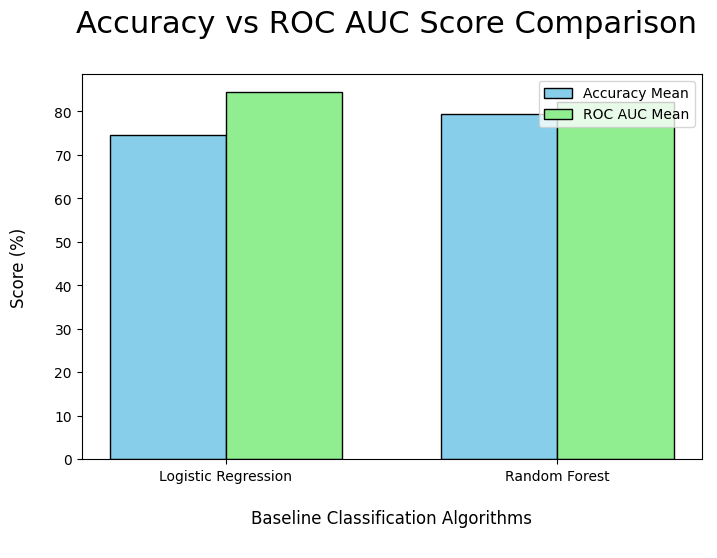

In [ ]:
# Step 15.2. Visualize Classification Algorithms Accuracy & ROC AUC Comparisons ------------------------------


x = np.arange(len(model_results['Algorithm']))  # positions for groups
width = 0.35  # width of the bars

plt.figure(figsize=(8,5))

# Plot Accuracy bars
plt.bar(x - width/2,
        model_results['Accuracy Mean'],
        width,
        label='Accuracy Mean',
        color='skyblue',
        edgecolor='black')

# Plot ROC AUC bars
plt.bar(x + width/2,
        model_results['ROC AUC Mean'],
        width, label='ROC AUC Mean',
        color='lightgreen',
        edgecolor='black')

# Labels and Title
plt.ylabel('Score (%)\n',
           horizontalalignment="center",
           fontstyle="normal",
           fontsize="large",
           fontfamily="sans-serif")
plt.xlabel('\nBaseline Classification Algorithms\n',
           horizontalalignment="center",
           fontstyle="normal",
           fontsize="large",
           fontfamily="sans-serif")
plt.title('Accuracy vs ROC AUC Score Comparison \n',
          horizontalalignment="center",
          fontstyle="normal",
          fontsize=22,
          fontfamily="sans-serif")

plt.legend(loc='upper right', fontsize="medium")

# Ticks
plt.xticks(x, model_results['Algorithm'], rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

# Show plot
plt.show()


### Step 15.3. SMOTE Oversampling

Tahap oversampling ini dilakukan pada tahap setelah data split dan cross validation ROC_AUC Scoring. Lalu hanya diaplikasikan hanya pada training set. Hal tersebut dikarenakan kalau dilakukan pada tahap sebelum splitting dan Cross_validation maka akan merubah hasil validation menjadi 50: 50 sementara seharusnya yaitu sekitar 74 : 26.

In [ ]:
from imblearn.over_sampling import SMOTE

#Apply SMOTE only on the training data
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE: ", y_train.value_counts())
print("After SMOTE: ", y_train_resampled.value_counts())

Before SMOTE:  Churn
0    4139
1    1495
Name: count, dtype: int64
After SMOTE:  Churn
0    4139
1    4139
Name: count, dtype: int64


### 15.4. Searching Optimum Number of Trees for Random Forest Model

In [ ]:
from sklearn.model_selection import cross_val_score

#Range of number of trees to test
n_estimators_range = [20, 40, 60, 80, 100]

In [ ]:
rf_results = {}

for n in n_estimators_range:
    rf = RandomForestClassifier(
        n_estimators=n,
        criterion='entropy',
        random_state=0
    )
    # Evaluate with cross-validation (using ROC AUC as scoring)
    scores = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=10, scoring='roc_auc')
    rf_results[n] = scores.mean()

# Print results
for n, score in rf_results.items():
    print(f"n_estimators: {n}, ROC AUC Mean: {score:.4f}")

# Find best number of trees
best_n = max(rf_results, key=rf_results.get)
print(f"\nOptimum number of trees: {best_n} with ROC AUC = {rf_results[best_n]:.4f}")

n_estimators: 20, ROC AUC Mean: 0.9234
n_estimators: 40, ROC AUC Mean: 0.9279
n_estimators: 60, ROC AUC Mean: 0.9298
n_estimators: 80, ROC AUC Mean: 0.9301
n_estimators: 100, ROC AUC Mean: 0.9306

Optimum number of trees: 100 with ROC AUC = 0.9306


I **selected 80 trees** because the ROC AUC score already stabilized around this point, achieving 0.9301. Increasing the number of trees to 100 only resulted in a marginal improvement of 0.0005, which does not significantly impact model performance. Therefore, using 80 trees strikes a good balance between accuracy and computational efficiency.

###Step 15.4. Compare Baseline Classification Algorithms

In [ ]:
#Step 15.4. Compare Baseline Classification Algorithms - Second Iteration-----------------------------
#--Step 15.4.1. Logistic Regression-----------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Fitting Logistic Regression to the Training set
log_reg = LogisticRegression(
    solver= 'liblinear',
    random_state=0,
    class_weight='balanced'
)
log_reg.fit(X_train_resampled, y_train_resampled)
# Predicting the Test set results
y_pred_log = log_reg.predict(X_test_scaled)

#Evaluate results
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_pred_log))
print("-"*50)

#Step 15.4.6. Decision Tree---------------------------------------------
# Fitting Decision Tree to the Training set:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train_resampled, y_train_resampled)

# Predicting the Test set results
y_pred_dt = dt.predict(X_test_scaled)

#Evaluate results
print("Decision Tree")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_pred_dt))
print("-"*50)

#Step 15.4.7. Random Forest--------------------------------------------


# Fitting Random Forest to the Training set:
rf = RandomForestClassifier(n_estimators=80, criterion='entropy', random_state=0)
rf.fit(X_train_resampled, y_train_resampled)


# Predicting the Test set results
y_pred_rf = rf.predict(X_test_scaled)

#Evaluate results
print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))
print("-"*50)

Logistic Regression
[[771 264]
 [ 77 297]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.79      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

ROC AUC: 0.7695225916453537
--------------------------------------------------
Decision Tree
[[835 200]
 [187 187]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.48      0.50      0.49       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

ROC AUC: 0.6533816425120773
--------------------------------------------------
Random Forest
[[897 138]
 [163 211]]
              precision    recall  f1-score   support

           0    

###Step 15.5. Visualize the results and compare the baseline algorithms

In [ ]:

#Step 15.5. Visualize the results and compare the baseline algorithms----------------------------------

# =======================================================================================================================
#Sort results based on the right classification metric:
#(Accuracy/ROC_AUC / Precision/Recall/F1/F2 scores)
results_sm = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.76, 0.73, 0.79],
    'Precision': [0.53, 0.48, 0.60],
    'Recall': [0.79, 0.50, 0.56],
    'F1 Score': [0.64, 0.49, 0.58],
    'ROC AUC': [0.7695, 0.6533, 0.7154]
})

#Since we have class imbalance. When we look into the business challenge,
# our false negatives will be costly and hence we need to Keep an eye onto the Precision, Recall & F2 score besides accuracy
# =======================================================================================================================
# Create DataFrame with results

from sklearn.metrics import fbeta_score
results_sm["F2 Score"] = [0.72, 0.52, 0.57]

# Sort based on Precision, Recall, F2 Score
results_sm = results_sm.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)


print (results_sm)

             Algorithm  Accuracy  Precision  Recall  F1 Score  ROC AUC  \
2        Random Forest      0.79       0.60    0.56      0.58   0.7154   
0  Logistic Regression      0.76       0.53    0.79      0.64   0.7695   
1        Decision Tree      0.73       0.48    0.50      0.49   0.6533   

   F2 Score  
2      0.57  
0      0.72  
1      0.52  


## 16. Train & Evaluate Chosen Model

For churn prediction, recall is more important than precision because missing actual churners (false negatives) is more costly for the company. Logistic Regression provides the highest recall (0.79) for the churn class, making it the most suitable model to identify at-risk customers for timely retention actions.

In [ ]:

#Step 16: Train & evaluate Chosen Model---------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, fbeta_score

# Fit Chosen Model on the Training dataset:
chosen_model = LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')
chosen_model.fit(X_train_resampled, y_train_resampled)

# Predict the Test set results
y_pred = chosen_model.predict(X_test_scaled)
y_proba = chosen_model.predict_proba(X_test_scaled)[:, 1]


#Evaluate Model Results on Test Set:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))

Confusion Matrix:
[[771 264]
 [ 77 297]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.79      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

ROC AUC: 0.8506497197034282
F2 Score: 0.7219251336898396


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


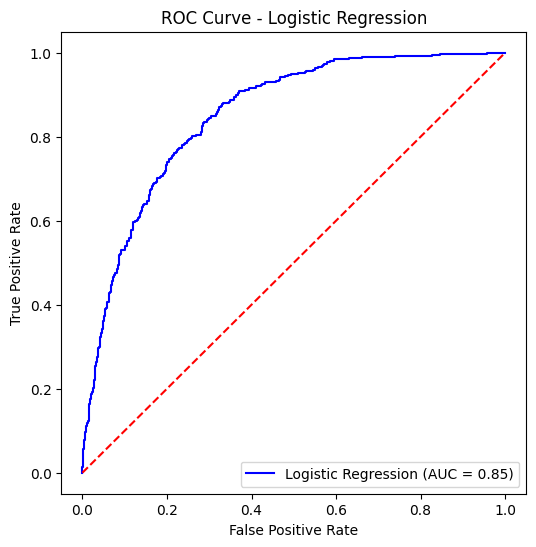

In [ ]:
# Evaluate the model using ROC Graph
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict probability untuk kelas positif (churn = 1)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # garis random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


##Analysis

---



In [ ]:
print ('Result Before Oversampling : ')
print (results)
print ('  ')
print ('Result After Oversampling : ')
print (results_sm)

Result Before Oversampling : 
{'Test ROC AUC': np.float64(0.8512361466325661), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.91      0.72      0.81      1035\n           1       0.52      0.81      0.63       374\n\n    accuracy                           0.75      1409\n   macro avg       0.71      0.77      0.72      1409\nweighted avg       0.81      0.75      0.76      1409\n', 'Confusion Matrix': array([[750, 285],
       [ 71, 303]])}
  
Result After Oversampling : 
             Algorithm  Accuracy  Precision  Recall  F1 Score  ROC AUC  \
2        Random Forest      0.79       0.60    0.56      0.58   0.7154   
0  Logistic Regression      0.76       0.53    0.79      0.64   0.7695   
1        Decision Tree      0.73       0.48    0.50      0.49   0.6533   

   F2 Score  
2      0.57  
0      0.72  
1      0.52  


Apa insight yang bisa didapat dengan handling data imbalance pada data diatas? Teknik apa yang anda gunakan? Jelaskan!

Answer: **SMOTE improved churn detection by increasing recall, which is more valuable for the business than maintaining higher precision**.

SMOTE successfully improved the model's ability to identify churn (higher recall), although precision slightly decreased. This aligns with the business need, as detecting as many churn cases as possible is more important, even if it comes with a slightly higher retention campaign cost.
